# Pytorch Tutorial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Basics of Pytorch
- matirx를 tensor라고 부름

In [2]:
# numpy array
array = [[1,2,3], [4,5,6]]
first_array = np.array(array) #2x3 array
print("Array Type : {}".format(type(first_array)))
print("Array Shape : {}".format(np.shape(first_array)))
print(first_array)

Array Type : <class 'numpy.ndarray'>
Array Shape : (2, 3)
[[1 2 3]
 [4 5 6]]


In [3]:
import torch

In [4]:
# pytorch array
tensor = torch.Tensor(array)
print("Array Type : {}".format(tensor.type))
print("Array Shape : {}".format(tensor.shape))
print(tensor)

Array Type : <built-in method type of Tensor object at 0x788275e3a7a0>
Array Shape : torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


- np.ones() = torch.ones()
- np.random.randn() = torch.rand()

In [5]:
# numpy ones
print("Numpy {}\n".format(np.ones((2,3))))

# pytorch ones
print(torch.ones((2,3)))

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [6]:
# numpy random
print("Numpy {}\n".format(np.random.rand(2,3)))

# pytorch random
print(torch.rand(2,3))

Numpy [[0.44947885 0.30621596 0.5330366 ]
 [0.17875947 0.22700808 0.29896312]]

tensor([[0.7050, 0.6768, 0.5127],
        [0.6612, 0.2519, 0.3106]])


conversion between tensor and numpy arrays
- torch.from_numpy() : from numpy to tensor
- numpy() : from tensor to numpy

In [7]:
# random numpy array
array = np.random.rand(2,2)
print("{} {}\n".format(type(array), array))

# from numpy to tensor
from_numpy_to_tensor = torch.from_numpy(array)
print("{}\n".format(from_numpy_to_tensor))

# from tensor to numpy
tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print("{} {}\n".format(type(from_tensor_to_numpy), from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.98510318 0.99540531]
 [0.02958747 0.72983243]]

tensor([[0.9851, 0.9954],
        [0.0296, 0.7298]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.98510318 0.99540531]
 [0.02958747 0.72983243]]



## Basic Math with Pytorch
- Resize : view()
- a and b are tensor.
- Addition : torch.add(a,b) = a + b
- Subtraction : a.sub(b) = a - b
- Element wise multiplication : torch.mul(a,b) = a * b
- Element wise division : torch.div(a,b) = a / b
- Mean : a.mean()
- Standart Deviation (std) : a.std()

In [9]:
# create tensor
tensor = torch.ones(3,3)
print("\n", tensor)

# resize
print("{}{}\n".format(tensor.view(9).shape, tensor.view(9)))

# addition
print("Addition : {}\n".format(torch.add(tensor, tensor)))

# subtraction
print("Subtraction : {}\n".format(tensor.sub(tensor)))

# element wise multiplication
print("Element wise multiplication : {}\n".format(torch.mul(tensor, tensor)))

# element wise division
print("Element wise division : {}\n".format(torch.div(tensor, tensor)))

# mean
tensor = torch.Tensor([1,2,3,4,5])
print("Mean : {}".format(tensor.mean()))

# standard deviation
print("std : {}".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition : tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction : tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication : tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division : tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean : 3.0
std : 1.5811388492584229


## Variables
- variable accumulates gradients

In [10]:
# import variable from pytorch library
from torch.autograd import Variable

# define variable
var = Variable(torch.ones(3), requires_grad=True)
var

tensor([1., 1., 1.], requires_grad=True)

- Assume we have equation y = x^2
- Define x = [2,4] variable
- After calculation we find that y = [4,16] (y = x^2)
- Recap o equation is that o = (1/2)sum(y) = (1/2)sum(x^2)
- deriavative of o = x
- Result is equal to x so gradients are [2,4]

In [11]:
# basic backward propagation
# y = x^2

array = [2,4]
tensor = torch.Tensor(array)

x = Variable(tensor, requires_grad=True)
y = x**2
print(" y =  ", y)

# recap o equation o = 1/2*sum(y)
o = (1/2)*sum(y)
print(" o =   ", o)

# backward
o.backward() # calculates gradients

# gradients
print("gradients : ", x.grad)

 y =   tensor([ 4., 16.], grad_fn=<PowBackward0>)
 o =    tensor(10., grad_fn=<MulBackward0>)
gradients :  tensor([2., 4.])


## Linear Regression
- 예시로, car compuny : car price low -> sell more, car price high -> sell less

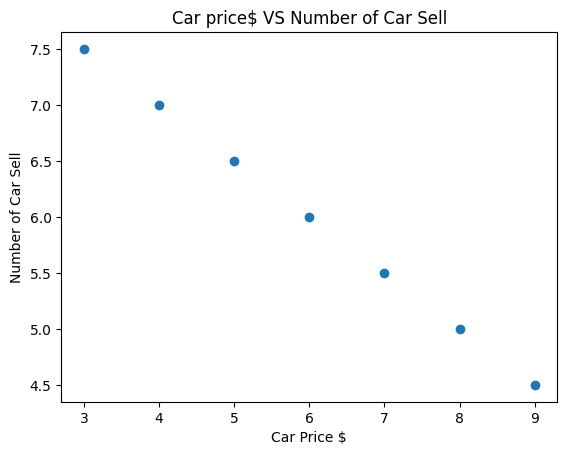

In [16]:
# define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array, dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# define number of car sell
number_of_car_sell_array = [7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array, dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# visualize data
plt.scatter(car_prices_array, number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car price$ VS Number of Car Sell")
plt.show()

Steps of Linear Regression

1.   create LinearRegression class
2.   define model from this LinearRegression class
3.   MSE: Mean squared error
4.   Optimization (SGD:stochastic gradient descent)
5.   Backpropagation
6.   Prediction

epoch 0, loss 53.186466217041016
epoch 50, loss 4.946056842803955
epoch 100, loss 3.3422577381134033
epoch 150, loss 2.2585041522979736
epoch 200, loss 1.5261656045913696
epoch 250, loss 1.0312942266464233
epoch 300, loss 0.6968884468078613
epoch 350, loss 0.47091665863990784
epoch 400, loss 0.3182182013988495
epoch 450, loss 0.21503357589244843
epoch 500, loss 0.145307257771492
epoch 550, loss 0.09819004684686661
epoch 600, loss 0.0663507729768753
epoch 650, loss 0.044836223125457764
epoch 700, loss 0.030297940596938133
epoch 750, loss 0.020473569631576538
epoch 800, loss 0.013834507204592228
epoch 850, loss 0.009348466992378235
epoch 900, loss 0.006317145191133022
epoch 950, loss 0.0042687831446528435
epoch 1000, loss 0.002884644316509366


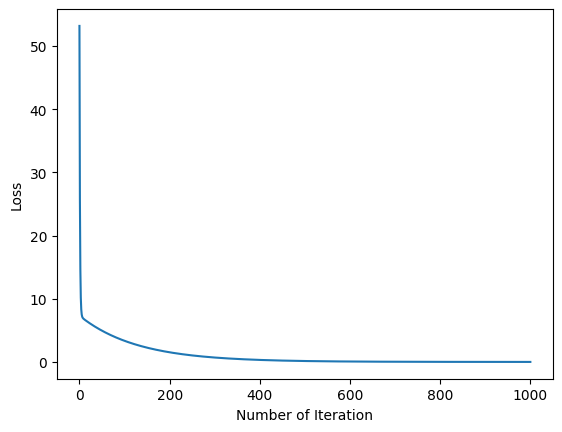

In [19]:
# libraries
import torch
from torch.autograd import Variable
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

# create class
class LinearRegression(nn.Module) :
  def __init__(self, input_size, output_size) :
    # super function : it inherits from nn.Module and we can access evrything in nn.Module
    super(LinearRegression, self).__init__()
    # Linear function
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x) :
    return self.linear(x)

# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

# MSE
mse = nn.MSELoss()

# Optimization (find parameters that minimize error)
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# train model
loss_list = []
iteration_number = 1001

for iteration in range(iteration_number) :

  # optimization
  optimizer.zero_grad()

  # Forward to get output
  results = model(car_price_tensor)

  # Calculate loss
  loss = mse(results, number_of_car_sell_tensor)

  # backward propagation
  loss.backward()

  # Updating parameters
  optimizer.step()

  # store loss
  loss_list.append(loss.data)

  # print loss
  if(iteration % 50 == 0) :
    print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number), loss_list)
plt.xlabel("Number of Iteration")
plt.ylabel("Loss")
plt.show()

while using trained model, lets predict car prices

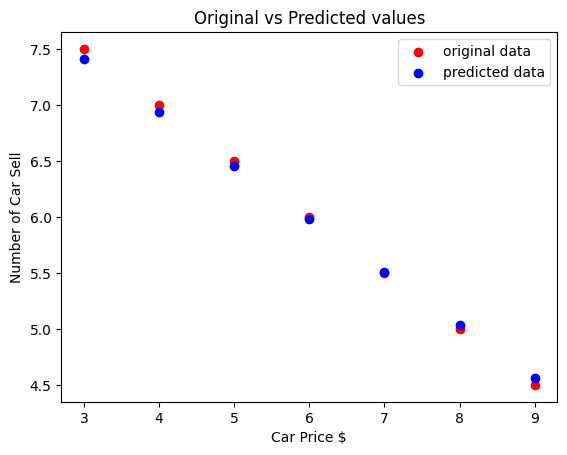

In [20]:
# predict our car price
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

## Logistic Regression

- Steps of Logistic Regression
1.  Import Libraries
2.  Prepare Dataset
- In our example: we have 33600 sample to train and we decide our batch_size is 100. Also we decide epoch is 29(accuracy achieves almost highest value when epoch is 29). Data is trained 29 times. Question is that how many iteration do I need? Lets calculate:
- training data 1 times = training 33600 sample (because data includes 33600 sample)
- But we split our data 336 groups(group_size = batch_size = 100) our data
- Therefore, 1 epoch(training data only once) takes 336 iteration
- We have 29 epoch, so total iterarion is 9744(that is almost 10000 which I used)

3.  Create Logistic Regression Model
4.  Instantiate Model
5.  Instantiate Loss
- cross entropy loss
6.  Instantiate Optimizer
- SGD Optimizer
7.  Training the model
8. prediction

In [21]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

In [27]:
# Prepare Dataset

# load data
train = pd.read_csv("/content/drive/MyDrive/머신러닝 딥러닝/유런/train.csv", dtype = np.float32)

In [28]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


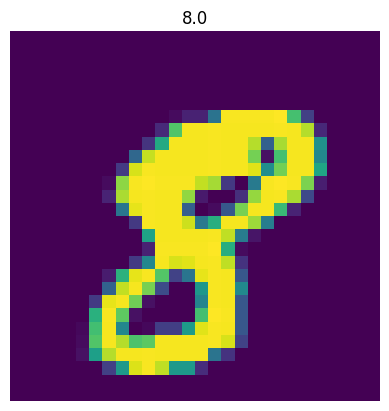

In [29]:
# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%.
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42)

# create feature and targets tensor for train set.
# As you remember we need variable to accumulate gradients.
# Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [30]:
# Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)
        # There should be logistic function right?
        # However logistic function in pytorch is in loss function
        # So actually we do not forget to put it, it is only at next parts

    def forward(self, x):
        out = self.linear(x)
        return out

# Instantiate Model Class
input_dim = 28*28 # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

# create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [31]:
# Traning the Model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # Define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)

        # Clear gradients
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(train)

        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)

        # Calculate gradients
        loss.backward()

        # Update parameters
        optimizer.step()

        count += 1

        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))

                # Forward propagation
                outputs = model(test)

                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]

                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.8175278902053833  Accuracy: 62.9523811340332%
Iteration: 1000  Loss: 1.6190826892852783  Accuracy: 74.05952453613281%
Iteration: 1500  Loss: 1.2847610712051392  Accuracy: 77.85713958740234%
Iteration: 2000  Loss: 1.2060810327529907  Accuracy: 79.89286041259766%
Iteration: 2500  Loss: 1.034712553024292  Accuracy: 81.29762268066406%
Iteration: 3000  Loss: 0.9377883076667786  Accuracy: 82.16666412353516%
Iteration: 3500  Loss: 0.9046710133552551  Accuracy: 82.76190185546875%
Iteration: 4000  Loss: 0.7547646164894104  Accuracy: 83.14286041259766%
Iteration: 4500  Loss: 0.9647111296653748  Accuracy: 83.58333587646484%
Iteration: 5000  Loss: 0.807249903678894  Accuracy: 83.97618865966797%
Iteration: 5500  Loss: 0.7592546939849854  Accuracy: 84.36904907226562%
Iteration: 6000  Loss: 0.8762891292572021  Accuracy: 84.76190185546875%
Iteration: 6500  Loss: 0.6680748462677002  Accuracy: 84.85713958740234%
Iteration: 7000  Loss: 0.7161367535591125  Accuracy: 85.202377319335

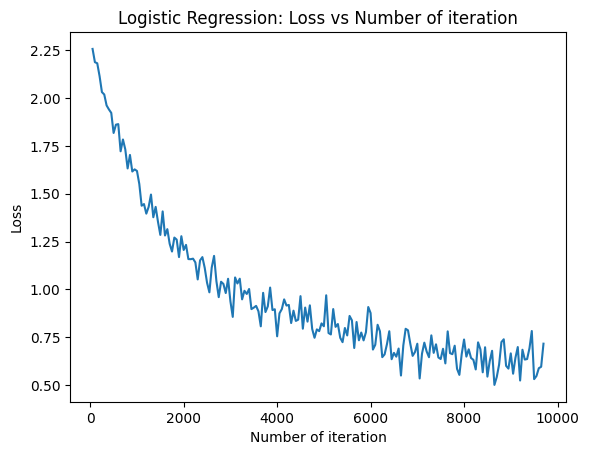

In [32]:
# visualization
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

## Artificial Neural Network (ANN)
- Logistic regression is good at classification but when complexity(non linearity) increases, the accuracy of model decreases.
- Therefore, we need to increase complexity of model.
- In order to increase complexity of model, we need to add more non linear functions as hidden layer.

steps of ANN
1.  Import Libraries
2.  Prepare Dataset
3.  Create ANN Model
- We add 3 hidden layers.
- We use ReLU, Tanh and ELU activation functions for diversity.
4.  Instantiate Model Class
5.  Instantiate Loss
6.  Instantiate Optimizer
7.  Training the Model
8. Prediction

In [33]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

In [34]:
# Create ANN Model
class ANNModel(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()

        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()

        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()

        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)

        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)

        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [35]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)

        # Clear gradients
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(train)

        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)

        # Calculating gradients
        loss.backward()

        # Update parameters
        optimizer.step()

        count += 1

        if count % 50 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))

                # Forward propagation
                outputs = model(test)

                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]

                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.7695844173431396  Accuracy: 79.10713958740234 %
Iteration: 1000  Loss: 0.46361514925956726  Accuracy: 87.26190185546875 %
Iteration: 1500  Loss: 0.23963132500648499  Accuracy: 89.39286041259766 %
Iteration: 2000  Loss: 0.3070067763328552  Accuracy: 90.51190185546875 %
Iteration: 2500  Loss: 0.3000008165836334  Accuracy: 91.89286041259766 %
Iteration: 3000  Loss: 0.13147999346256256  Accuracy: 92.54762268066406 %
Iteration: 3500  Loss: 0.21886898577213287  Accuracy: 93.60713958740234 %
Iteration: 4000  Loss: 0.0632704645395279  Accuracy: 94.25 %
Iteration: 4500  Loss: 0.3035183250904083  Accuracy: 94.4047622680664 %
Iteration: 5000  Loss: 0.105600506067276  Accuracy: 94.86904907226562 %
Iteration: 5500  Loss: 0.19268716871738434  Accuracy: 94.80952453613281 %
Iteration: 6000  Loss: 0.17461496591567993  Accuracy: 95.08333587646484 %
Iteration: 6500  Loss: 0.09485574811697006  Accuracy: 95.4047622680664 %
Iteration: 7000  Loss: 0.10871005803346634  Accuracy: 95.75 

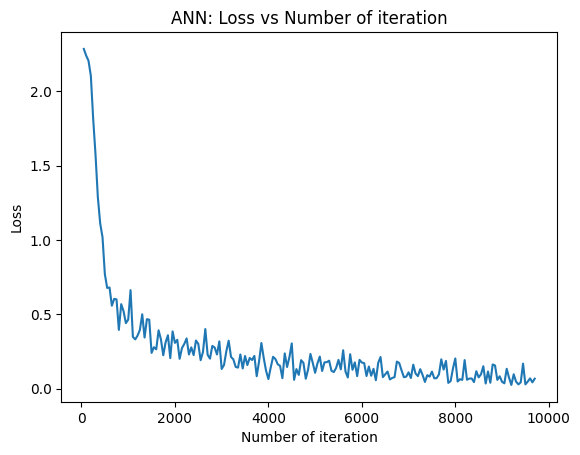

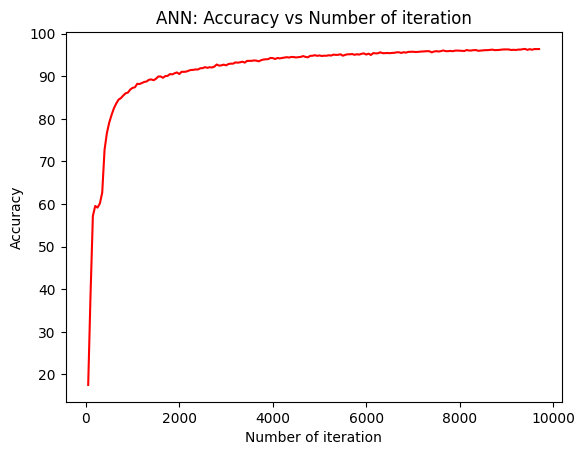

In [36]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()